# Case Study 1 : Data Mining in Financial Data

**Financial Data Collection:** 
* Please collect five-year stock price data of at least 5 stocks. You can choose any stocks you'd like to analyze.
* You have multiple ways of collecting financial data with Python, here is a reference: https://www.alpharithms.com/python-financial-data-491110/
* Load the data you collect and start working on your idea.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

# Problem: Stock Price Prediction

In [ ]:

This case study aimed to forecast the stock prices of five electronics companies: Samsung, Dell, Lenovo, Apple, and Microsoft, 
arose from their shared industry niche and distinct market positioning, offering a diverse landscape for model evaluation.
We used two machine learning models – random forest and linear regression. Historical data from Yahoo Finance served as the 
training ground for both models.

To evaluate their performance, we employed the mean squared error metric and compared the results.

Tha mainpurpose of predicting stock prices involves forecasting a continuous value (the price) based on various inputs, 
like historical prices and market indicators. Typically, this is approached as a regression problem. However, it can also be 
framed as a classification problem, where the goal is to predict whether the price will rise or fall within a certain timeframe.



# Data Collection/Processing: 

In [80]:
# Getting the stock data from yahoo
!pip install yfinance
import yfinance as yf

# Defined the start and end dates for the data
start_date = "2019-01-25"
end_date = "2024-01-25"

# List of stock tickers
stock_list = ["SMSN.IL", "DELL", "LNVGY", "AAPL", "MSFT"]

data = yf.download(stock_list, start=start_date, end=end_date)

# Get the adjusted close prices from the data
df = data["Adj Close"]
print(data.info(10))
df.head(10)

[*********************100%%**********************]  5 of 5 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1287 entries, 2019-01-25 to 2024-01-24
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, AAPL)     1258 non-null   float64
 1   (Adj Close, DELL)     1258 non-null   float64
 2   (Adj Close, LNVGY)    1258 non-null   float64
 3   (Adj Close, MSFT)     1258 non-null   float64
 4   (Adj Close, SMSN.IL)  1261 non-null   float64
 5   (Close, AAPL)         1258 non-null   float64
 6   (Close, DELL)         1258 non-null   float64
 7   (Close, LNVGY)        1258 non-null   float64
 8   (Close, MSFT)         1258 non-null   float64
 9   (Close, SMSN.IL)      1261 non-null   float64
 10  (High, AAPL)          1258 non-null   float64
 11  (High, DELL)          1258 non-null   float64
 12  (High, LNVGY)         1258 non-null   float64
 13  (High, MSFT)          1258 non-null   float64
 14  (High, SMSN.IL)       1261 non-null   float64
 15  (Lo

Ticker,AAPL,DELL,LNVGY,MSFT,SMSN.IL
Date,,,,,
2019-01-25,37.854939,21.957155,11.628410,101.768341,880.825867
2019-01-28,37.504608,22.430639,11.477494,99.783661,873.740356
2019-01-29,37.115891,22.406727,11.413951,97.751526,889.239929
2019-01-30,39.652191,22.956732,11.636353,101.018135,901.639587
2019-01-31,39.937729,23.238911,11.676067,99.166435,911.382385
2019-02-01,39.956940,23.745869,11.795212,97.599594,911.382385
2019-02-04,41.091908,24.310223,11.850812,100.410393,906.068176
2019-02-05,41.794960,24.425007,11.930241,101.815819,920.239441
2019-02-06,41.809364,24.362829,11.834925,100.685768,923.782288


In [81]:
# Download and print the high price data
High_data = yf.download(stock_list,'2019-1-20','2024-2-20')['High']
print("\t\n High Data\n\n",High_data)

# Download and print the low price data
Low_data = yf.download(stock_list,'2019-1-20','2024-2-20')['Low']
print("\t\n Low Data\n\n",Low_data)


[*********************100%%**********************]  5 of 5 completed


	
 High Data

 Ticker            AAPL       DELL      LNVGY        MSFT  SMSN.IL
Date                                                             
2019-01-21         NaN        NaN        NaN         NaN    950.0
2019-01-22   39.182499  22.630512  14.810000  107.099998    933.0
2019-01-23   38.785000  23.258995  14.380000  107.040001    940.0
2019-01-24   38.619999  22.878864  14.550000  107.000000    974.5
2019-01-25   39.532501  23.314749  14.700000  107.879997   1004.0
...                ...        ...        ...         ...      ...
2024-01-24  196.380005  84.919998  26.290001  405.630005   1403.0
2024-01-25  196.270004  85.040001  26.420000  407.010010   1399.0
2024-01-26  194.759995  84.379997  24.000000  406.170013   1392.0
2024-01-29  192.199997  84.669998  23.000000  409.980011   1402.0
2024-01-30  191.800003  86.449997  21.900000  413.040009   1398.0

[1295 rows x 5 columns]


[*********************100%%**********************]  5 of 5 completed

	
 Low Data

 Ticker            AAPL       DELL      LNVGY        MSFT  SMSN.IL
Date                                                             
2019-01-21         NaN        NaN        NaN         NaN    940.0
2019-01-22   38.154999  21.951344  14.410000  104.860001    926.5
2019-01-23   37.924999  22.513939  14.280000  105.339996    925.0
2019-01-24   37.935001  22.407501  14.290000  105.339996    950.0
2019-01-25   38.580002  22.919413  14.430000  106.199997    990.5
...                ...        ...        ...         ...      ...
2024-01-24  194.339996  83.000000  26.010000  400.450012   1380.0
2024-01-25  193.110001  83.010002  26.020000  402.529999   1383.0
2024-01-26  191.940002  82.120003  23.799999  402.429993   1376.0
2024-01-29  189.580002  83.349998  22.150000  404.329987   1391.0
2024-01-30  187.470001  84.320000  21.750000  406.450104   1385.0

[1295 rows x 5 columns]


# Data Exploration: Exploring the Dataset

**Plot the daily, weekly and monthly returns of a set of stocks of your choice** 
* references:
    * https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
    * https://www.fool.com/knowledge-center/how-to-calculate-a-monthly-return-on-investment/#:~:text=Take%20the%20ending%20balance%2C%20and,corresponds%20to%20your%20monthly%20return.
    * https://www.investopedia.com/terms/i/intraday-return.asp#:~:text=How%20Is%20Daily%20Return%20Calculated,price%2C%20then%20multiply%20by%20100. 


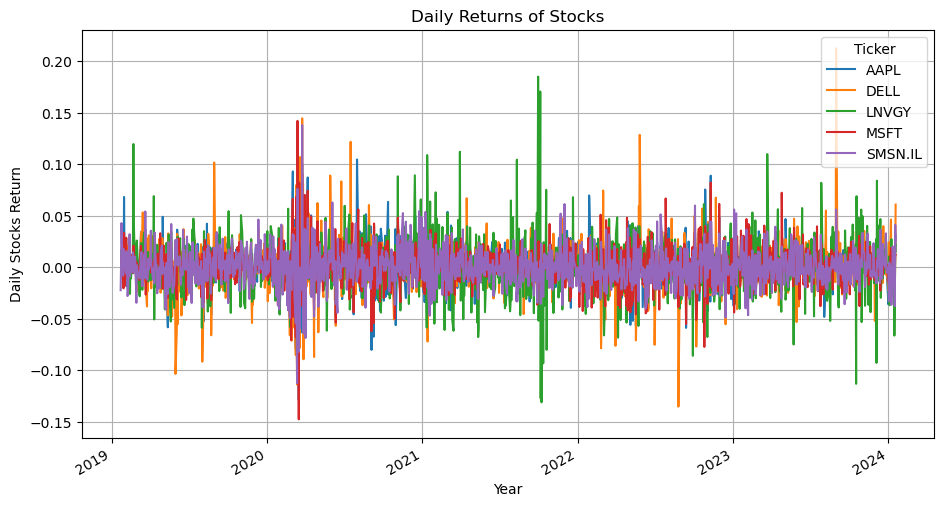

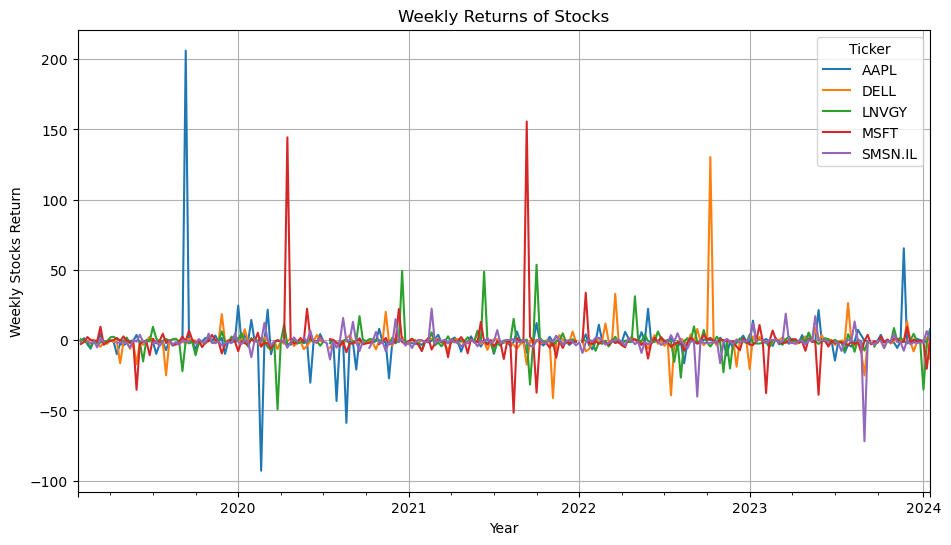

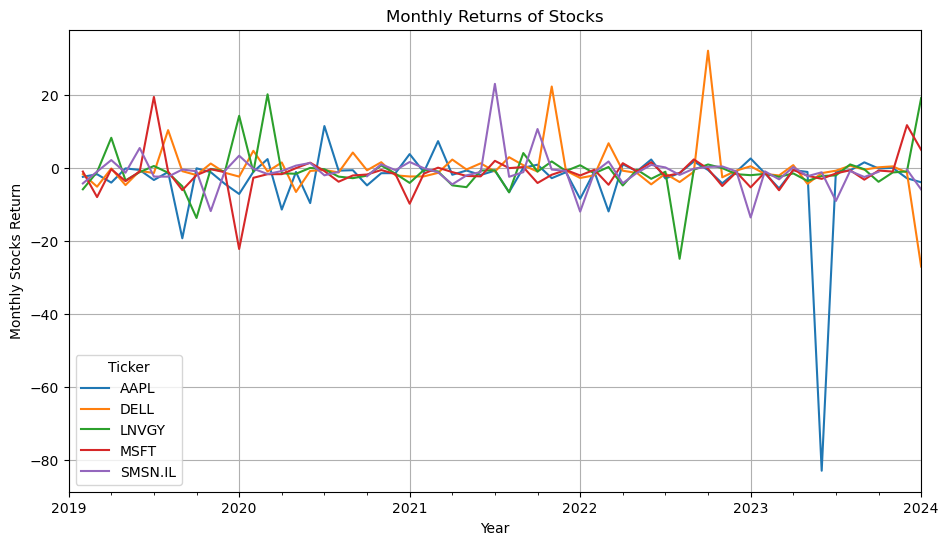

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily returns first
returns = df.pct_change()

# Plotting daily returns
returns.plot(figsize=(11,6))
plt.title("Daily Returns of Stocks")
plt.xlabel("Year")
plt.ylabel("Daily Stocks Return")
plt.grid(True)
plt.show()

# Calculate weekly returns before plotting
weekly_returns = returns.resample('W').last().pct_change()

# Plotting weekly returns
weekly_returns.plot(figsize=(11,6))
plt.title("Weekly Returns of Stocks")
plt.xlabel("Year")
plt.ylabel("Weekly Stocks Return")
plt.grid(True)
plt.show()

# Calculate weekly returns before plotting
monthly_returns = returns.resample('M').last().pct_change()

# Plotting monthly returns
monthly_returns.plot(figsize=(11,6))
plt.title("Monthly Returns of Stocks")
plt.xlabel("Year")
plt.ylabel("Monthly Stocks Return")
plt.grid(True)
plt.show()



**Other data explorations you would like to present:**

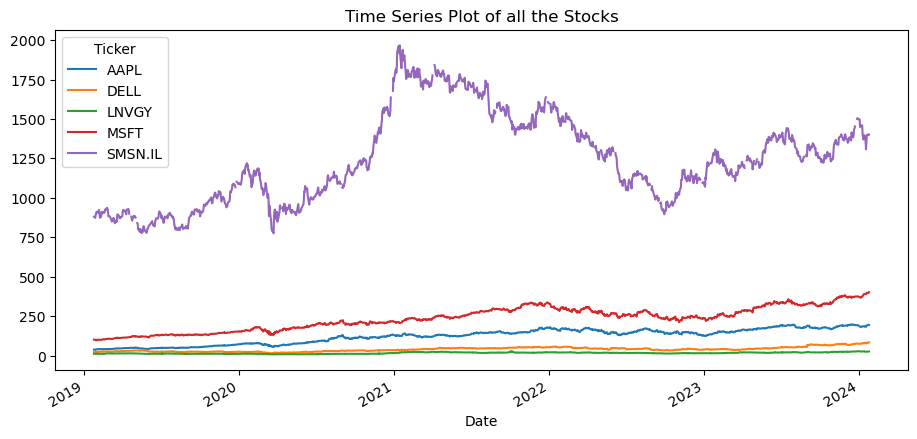

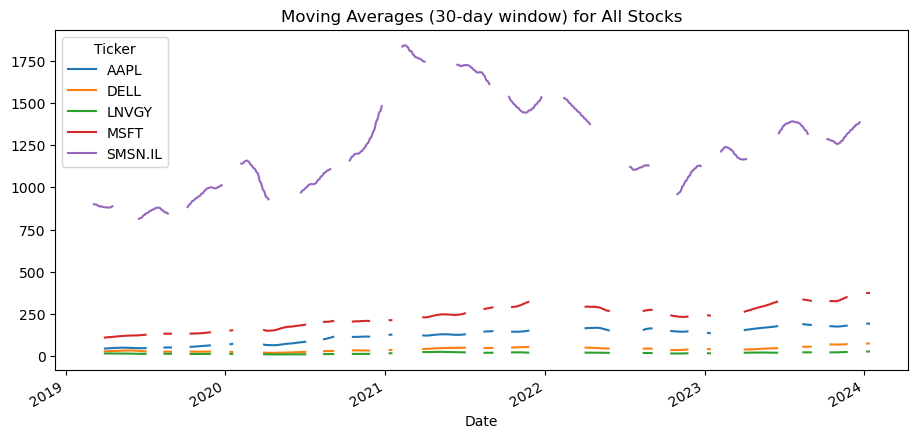

Ticker       AAPL      DELL     LNVGY      MSFT   SMSN.IL
Ticker                                                   
AAPL     1.000000  0.847094  0.765468  0.968684  0.610588
DELL     0.847094  1.000000  0.875457  0.904394  0.588894
LNVGY    0.765468  0.875457  1.000000  0.798233  0.746644
MSFT     0.968684  0.904394  0.798233  1.000000  0.618962
SMSN.IL  0.610588  0.588894  0.746644  0.618962  1.000000


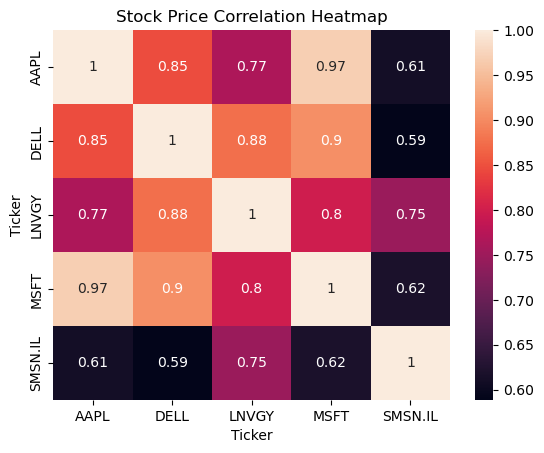

In [88]:
# (Fig.1 and Fig.2) Time Series Analysis - It helps in visualizing patterns and trends in stock prices. It helps to track how 
# prices vary over time, indicating whether they go up or down in the long run.

# (Fig.3) Correlation matrix - You can calculate the correlation matrix of the stocks to see how the stock prices are related to
# each other. This can give you an idea of which stocks move together and which stocks move in opposite directions.

import matplotlib.pyplot as plt

# Fig.1 Plot all time series to see the overall trends
df.plot(figsize=(11, 5))
plt.title("Time Series Plot of all the Stocks")
plt.show()

# Fig.2 Calculating the moving averages, filter out noise and highlight trends:
df.rolling(window=30).mean().plot(figsize=(11, 5))
plt.title("Moving Averages (30-day window) for All Stocks")
plt.show()

# Fig.3 Calculating the correlation matrix for stock price data
corrmatrix = df.corr()
print(corrmatrix)

import seaborn as sns
sns.heatmap(corrmatrix, annot=True)
plt.title("Stock Price Correlation Heatmap")
plt.show()



# The Solution: implement a data science solution to the problem you are trying to solve.

**Briefly describe the idea of your solutions to the problem in the following cell (you should use at least 2 methods/models to solve the problem, and compare the performance. You are free to use any machine learning model or statistical model like ARIMA.):**

In [ ]:
Here, I have collected 5-year stock data of 5 stocks. I have implemented stock price prediction data science problem in this 
case study and used 2 machine learning models - Linear Regression model and Random Forest Model by splitting the data.

Printed the performance of 2 models - compared the performance of the 2 models by using evaluation metrics mean squared error.

In [94]:
df.isnull().sum()

Ticker
AAPL       29
DELL       29
LNVGY      29
MSFT       29
SMSN.IL    26
dtype: int64

**Write codes to implement the solution in python:**

In [101]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Selecting the Close price of the stock
# df = data["Adj Close"]

# Splitting the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.8, random_state=1)

train_df.dropna(subset=[train_df.columns[-1]], inplace=True)
test_df.dropna(subset=[test_df.columns[-1]], inplace=True)


# Define the target and predictor variables for the linear regression model
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fitting the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_imputed, y_train)
lin_reg_pred = lin_reg.predict(X_test_imputed)

# Calculating the mean squared error of the linear regression model
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)

# Fitting the random forest model
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X_train_imputed, y_train)
rf_reg_pred = rf_reg.predict(X_test_imputed)

# Calculating the mean squared error of the random forest model
rf_reg_mse = mean_squared_error(y_test, rf_reg_pred)

print("Linear Regression Model MSE:", lin_reg_mse)
print("Random Forest Model MSE:", rf_reg_mse)


Linear Regression Model MSE: 31887.35123112805
Random Forest Model MSE: 8916.927137039182


# Results: summarize and visualize the results discovered from the analysis

**Summarize the results of different models. Compare the perfomance and explain it. Please use figures or tables to present the results.**


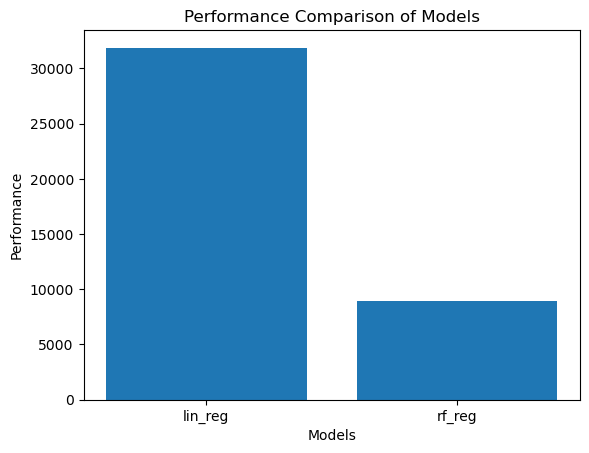

In [98]:
# Bar plot
results = {
    'lin_reg': lin_reg_mse , 
    'rf_reg': rf_reg_mse
}

x = list(results.keys())
y = list(results.values())

fig, ax = plt.subplots()
ax.bar(x, y)
ax.set_title("Performance Comparison of Models")
ax.set_xlabel("Models")
ax.set_ylabel("Performance")
plt.show()



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace. This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. 


**How to submit:**
* Please submit through BrightSpace, in the Assignment "Case Study 1".
        
        
